## Introducción
En este notebook procesaremos algunos datos que vamos a utilizar en la introducción de la memoria para contextualizar el proyecto.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import plotly.express as px
pd.options.mode.chained_assignment = None

### Evolución población en España

In [2]:
Poblacion = pd.read_excel('Poblacion_España.xlsx')

Poblacion.head()

,Periodo,Total Nacional
0,1 de enero de 1971,34040642
1,1 de enero de 1972,34408338
2,1 de enero de 1973,34800600
3,1 de enero de 1974,35177294
4,1 de enero de 1975,35569375


In [3]:
Poblacion['Año'] = Poblacion['Periodo'].str[-4:].astype('int')

Poblacion.head()

,Periodo,Total Nacional,Año
0,1 de enero de 1971,34040642,1971
1,1 de enero de 1972,34408338,1972
2,1 de enero de 1973,34800600,1973
3,1 de enero de 1974,35177294,1974
4,1 de enero de 1975,35569375,1975


In [4]:
Poblacion = Poblacion[(Poblacion['Año'] >1990) & (Poblacion['Año'] <=2021)]

Poblacion.head()

,Periodo,Total Nacional,Año
20,1 de enero de 1991,38881416,1991
21,1 de enero de 1992,39051336,1992
22,1 de enero de 1993,39264034,1993
23,1 de enero de 1994,39458489,1994
24,1 de enero de 1995,39639726,1995


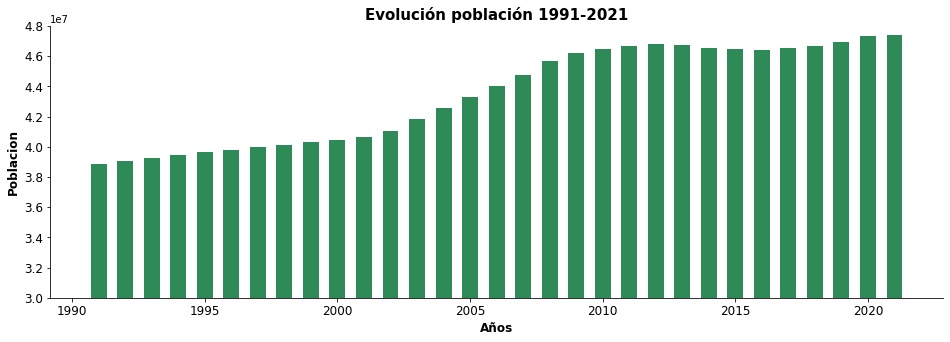

In [5]:
f, ax = plt.subplots(figsize = (16,5))

plt.bar(Poblacion['Año'], Poblacion['Total Nacional'], color = 'seagreen', width = 0.6)

ax.set_title("Evolución población 1991-2021", fontweight="bold", size=15)
ax.set_xlabel("Años", fontweight = "bold", size = 12)
ax.set_ylabel("Poblacion", fontweight = "bold", size = 12)
ax.set_ylim(3e7, 48e6)
ax.tick_params(labelsize = 12) #tamaño fuente ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

Incremento población en estos 30 años:

In [6]:
Incremento = ((Poblacion['Total Nacional'].loc[50] - Poblacion['Total Nacional'].loc[20])\
                /Poblacion['Total Nacional'].loc[20])*100

Incremento.round(2)

21.91

### Evolución % población residentes en zonas urbanas

In [7]:
ZonasUrbanas = pd.read_excel('Poblacion_Zonas_Urbanas.xls')

ZonasUrbanas.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Población urbana (% del total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,NaN,AFE,Población urbana (% del total),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,...,33.040474,33.476208,33.936959,34.425581,34.894750,35.358898,35.847596,36.336258,36.828301,37.323697
2,Afganistán,AFG,Población urbana (% del total),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000
3,NaN,AFW,Población urbana (% del total),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,...,42.925885,43.554094,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806
4,Angola,AGO,Población urbana (% del total),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,61.268000,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000


In [8]:
ZonasUrbanasEspaña = ZonasUrbanas[ZonasUrbanas['Country Name'] == 'España']

ZonasUrbanasEspaña.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
70,España,ESP,Población urbana (% del total),SP.URB.TOTL.IN.ZS,56.567,57.303,58.308,59.306,60.298,61.278,...,78.902,79.133,79.366,79.602,79.84,80.08,80.321,80.565,80.81,81.056


In [9]:
ZonasUrbanasEspaña.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
ZonasUrbanasEspaña = ZonasUrbanasEspaña.melt(id_vars='Country Name')

ZonasUrbanasEspaña.head()

,Country Name,variable,value
0,España,1960,56.567
1,España,1961,57.303
2,España,1962,58.308
3,España,1963,59.306
4,España,1964,60.298


In [10]:
ZonasUrbanasEspaña.rename({'variable' : 'Año', 'value' : 'PorcentUrban'}, axis = 1, inplace = True)
ZonasUrbanasEspaña['Año'] = ZonasUrbanasEspaña['Año'].astype('int')
ZonasUrbanasEspaña = ZonasUrbanasEspaña[ZonasUrbanasEspaña['Año'] % 5 == 0] 

ZonasUrbanasEspaña.head()

,Country Name,Año,PorcentUrban
0,España,1960,56.567
5,España,1965,61.278
10,España,1970,66.038
15,España,1975,69.570
20,España,1980,72.789


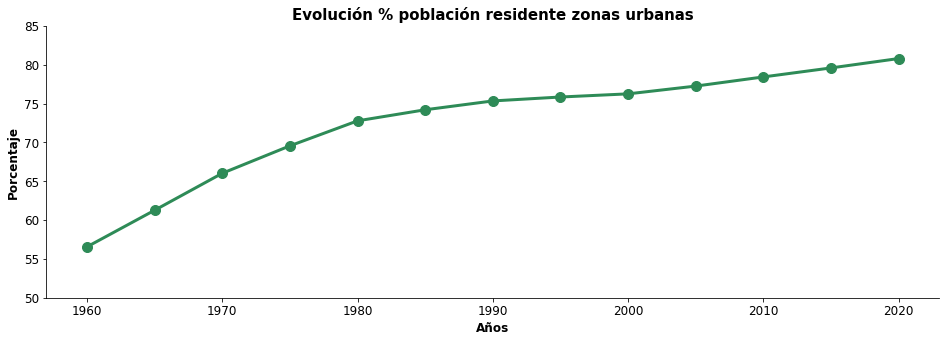

In [11]:
f, ax = plt.subplots(figsize = (16,5))

ax.plot(ZonasUrbanasEspaña['Año'], ZonasUrbanasEspaña['PorcentUrban'], color = 'seagreen',
        linewidth = 3, marker = 'o', markersize = 10)

ax.set_title("Evolución % población residente zonas urbanas", fontweight = "bold", size=15)
ax.set_xlabel("Años", fontweight = "bold", size = 12)
ax.set_ylabel("Porcentaje", fontweight="bold", size = 12)
ax.set_ylim(50, 85)
ax.tick_params(labelsize = 12) #tamaño fuente ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Comparativa % población residentes en zonas urbanas paises Unión Europea

In [12]:
PathEuropa = 'GeoEU/CNTR_RG_01M_2020_4326.shp'
Mapa = gpd.read_file(PathEuropa)
Mapa.head()

,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
0,PF,Polynésie Française,French Polynesia,Polynésie française,PYF,FR Territory,Papeete,F,F,F,Französisch-Polynesien,PF,"MULTIPOLYGON (((-134.46204 -23.36738, -134.476..."
1,KI,Kiribati,Kiribati,Kiribati,KIR,UN Member State,Tarawa,F,F,F,Kiribati,KI,"MULTIPOLYGON (((176.84759 -2.67149, 176.84559 ..."
2,AE,الإمارات العربية المتحدة,United Arab Emirates,Émirats arabes unis,ARE,UN Member State,Abu Dhabi,F,F,F,Vereinigten Arabischen Emirate,AE,"MULTIPOLYGON (((51.59056 24.24298, 51.59787 24..."
3,AD,Andorra,Andorra,Andorre,AND,UN Member State,Andorra la Vella,F,F,F,Andorra,AD,"POLYGON ((1.44257 42.60367, 1.45615 42.60265, ..."
4,AO,Angola,Angola,Angola,AGO,UN Member State,Luanda,F,F,F,Angola,AO,"MULTIPOLYGON (((23.42989 -17.63446, 22.85778 -..."


Nos quedamos solo con los paises que pertenecen a la UE:

In [13]:
MapaUE = Mapa[Mapa['EU_STAT'] == 'T']

MapaUE.shape

(27, 13)

In [14]:
MapaUE.head()

,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
13,AT,Österreich,Austria,Autriche,AUT,UN Member State,Vienna,T,F,F,Österreich,AT,"MULTIPOLYGON (((10.45444 47.55580, 10.47320 47..."
18,BE,Belgien-Belgique-België,Belgium,Belgique,BEL,UN Member State,Brussels,T,F,F,Belgien,BE,"MULTIPOLYGON (((6.02100 50.75429, 6.03977 50.7..."
24,BG,България,Bulgaria,Bulgarie,BGR,UN Member State,Sofia,T,F,F,Bulgarien,BG,"POLYGON ((22.67516 44.21566, 22.69084 44.20456..."
51,DK,Danmark,Denmark,Danemark,DNK,UN Member State,Copenhagen,T,F,F,Dänemark,DK,"MULTIPOLYGON (((15.19308 55.32014, 15.19056 55..."
54,ES,España,Spain,Espagne,ESP,UN Member State,Madrid,T,F,F,Spanien,ES,"MULTIPOLYGON (((4.09361 40.06178, 4.10332 40.0..."


Utilizamos la tabla de ZonasUrbanas del apartado anterior:

In [15]:
ZonasUrbanasUE = ZonasUrbanas[['Country Code', '2021']]
ZonasUrbanasUE.rename({'Country Code' : 'ISO3_CODE'}, axis = 1, inplace = True)

ZonasUrbanasUE.head()

,ISO3_CODE,2021
0,ABW,43.866000
1,AFE,37.323697
2,AFG,26.314000
3,AFW,48.454806
4,AGO,67.460000


In [16]:
ZonasUrbanasUE = MapaUE.merge(ZonasUrbanasUE, on = 'ISO3_CODE')

ZonasUrbanasUE.head()

,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry,2021
0,AT,Österreich,Austria,Autriche,AUT,UN Member State,Vienna,T,F,F,Österreich,AT,"MULTIPOLYGON (((10.45444 47.55580, 10.47320 47...",58.995
1,BE,Belgien-Belgique-België,Belgium,Belgique,BEL,UN Member State,Brussels,T,F,F,Belgien,BE,"MULTIPOLYGON (((6.02100 50.75429, 6.03977 50.7...",98.117
2,BG,България,Bulgaria,Bulgarie,BGR,UN Member State,Sofia,T,F,F,Bulgarien,BG,"POLYGON ((22.67516 44.21566, 22.69084 44.20456...",76.025
3,DK,Danmark,Denmark,Danemark,DNK,UN Member State,Copenhagen,T,F,F,Dänemark,DK,"MULTIPOLYGON (((15.19308 55.32014, 15.19056 55...",88.240
4,ES,España,Spain,Espagne,ESP,UN Member State,Madrid,T,F,F,Spanien,ES,"MULTIPOLYGON (((4.09361 40.06178, 4.10332 40.0...",81.056


In [17]:
ZonasUrbanasUE = ZonasUrbanasUE.to_crs(epsg=4327)

lga_json = ZonasUrbanasUE.__geo_interface__ #convertir a GeoJSON

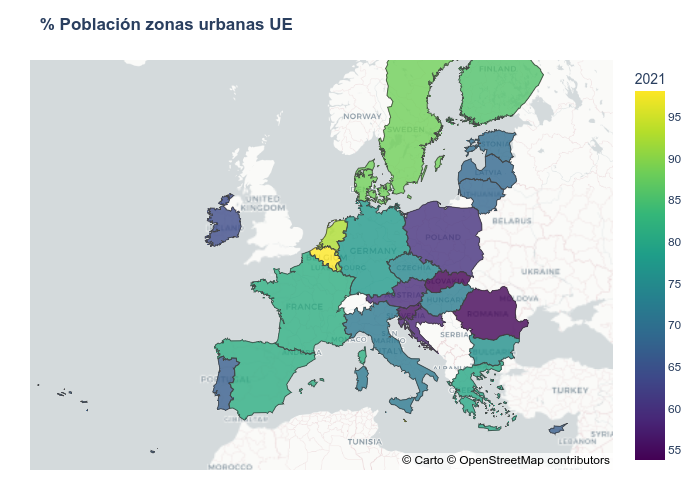

In [18]:
zmin = ZonasUrbanasUE['2021'].min()
zmax = ZonasUrbanasUE['2021'].max()

fig = px.choropleth_mapbox(ZonasUrbanasUE, geojson=lga_json, locations = ZonasUrbanasUE.index,
                           color = ZonasUrbanasUE['2021'],
                           color_continuous_scale="viridis",
                           range_color = (zmin,zmax),
                           hover_name = ZonasUrbanasUE['NAME_ENGL'],   
                           mapbox_style = "carto-positron",
                           zoom = 2.5 ,height = 500,
                           center = dict(lat = 50 , lon = 4),  
                           opacity=0.8,  
                           title = f"<b> % Población zonas urbanas UE</b>")
fig.update_layout(margin = dict(l = 30, r = 30, t = 60, b = 30))
fig.update_layout(font=dict(family = 'sans-serif',size = 12))

fig.show('png')

Tasa de urbanización España y media UE:

In [19]:
round(ZonasUrbanasUE['2021'].loc[4], 2)

81.06

In [20]:
round(ZonasUrbanasUE['2021'].mean(), 2)

73.97